In [164]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [165]:
# settings
CMAP = 'viridis'
dim = 2

In [166]:
# import node embeddings
df = pd.read_csv(
    f"./data/facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_ds-0.0_d-{dim}_type-BGMM_k-10.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [167]:
# import train
train = pd.read_csv("./data/facebook_train.csv", index_col=0)
train

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [168]:
# import predicted labels
labels = np.genfromtxt(f"./data/labels_pred_BGMM_d{dim}_k10.txt")
labels

array([1., 1., 1., ..., 6., 6., 6.])

In [169]:
df['label'] = labels

In [170]:
display(df)
display(df.describe())

,1,2,label
node,,,
0,-4.001292,4.017002,1.0
1,-4.303226,4.328349,1.0
2,-3.510165,3.493527,1.0
3,-4.429653,4.469522,1.0
4,-3.582412,3.565915,1.0
...,...,...,...
4033,-1.945650,1.498925,6.0
4034,-1.973810,1.497245,6.0
4036,-1.855735,1.397581,6.0


,1,2,label
count,3964.000000,3964.000000,3964.000000
mean,-3.137470,-0.250075,2.614026
std,1.930306,3.969619,1.606467
min,-6.907726,-7.603607,1.000000
25%,-4.914396,-3.758388,1.000000
50%,-3.191420,-0.248374,2.000000
75%,-1.127887,3.132293,3.000000
max,-0.400827,6.904348,6.000000


In [171]:
# get nx train graph
G = nx.from_pandas_edgelist(train, "u", "v")

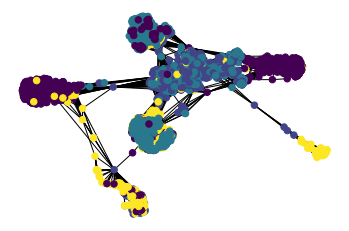

In [172]:
# plot spring graph
plt.axis("off")
nx.draw_networkx(G,
                 node_color=df.label,
                 cmap=plt.get_cmap(CMAP),
                 with_labels=False,
                 node_size=42)
plt.savefig(f"./plots/graph_d{dim}.png")


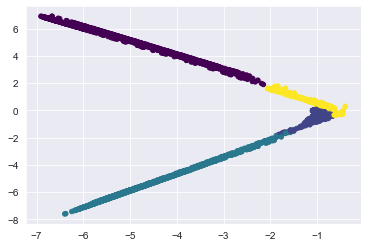

In [173]:
# plot embedding
plt.scatter(df[1], df[2], 20, c=df.label, marker="o", cmap=CMAP)
plt.savefig(f"./plots/node_emb_d{dim}.png")